# Review 
As I know what type of task will be on competition, I'll try to do similar problem with 
[job_salary_prediction_dataset](https://www.kaggle.com/competitions/job-salary-prediction/)

# First data understanding and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from tqdm.notebook import tqdm

# Train

In [2]:
train_df = pd.read_csv('data/Train_rev1.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [4]:
train_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [5]:
train_df['FullDescription'].duplicated().sum()

2630

In [6]:
train_df = train_df.sample(n=int(0.1*train_df.shape[0]), random_state=1)

In [7]:
X_train, y_train = train_df['FullDescription'], train_df['SalaryNormalized']

In [8]:
X_train.iloc[1], y_train.iloc[1]

('Job Title: Retail Director Location: Midlands and Southern England Salary Package **** to **** plus outstanding package COREcruitment specialises in management recruitment for the catering and Leisure industries across the UK. We represent a fresh approach to careers The Company:  Newly invigorated hospitality business with MASSIVE opportunities  Vibrant culture and trainingoriented goals  A work hard  play hard culture  Goal and target driven culture that will interest and motivate the right individual  Established business that has drive and motivation The Role:  Managing a team and a brand at senior management level  you will have COMPLETE accountability for your business  A diverse position with lots of space for personal and professional development  Responsibility for operating **** business units and an area management team  Creating a fun environment with good working culture for those in your team  Full responsibility for financial performance of ?your` business  Concept dev

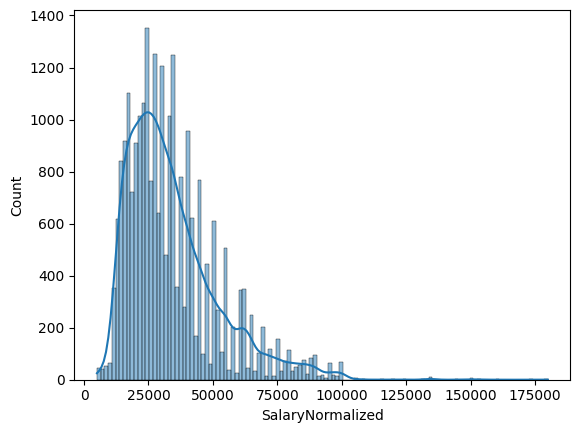

In [9]:
ax = sns.histplot(y_train, kde=True)

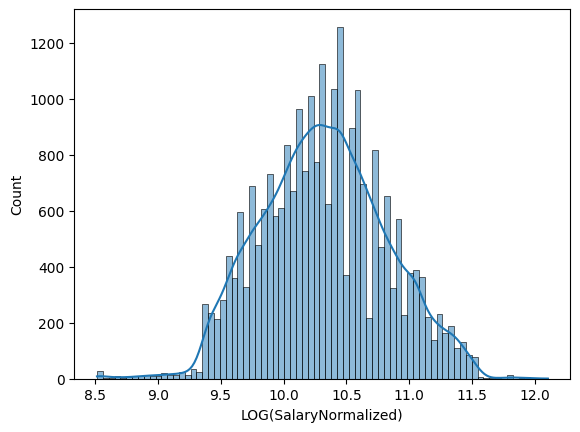

In [10]:
ax = sns.histplot(np.log(y_train), kde=True)
ax.set_xlabel("LOG(SalaryNormalized)")
None

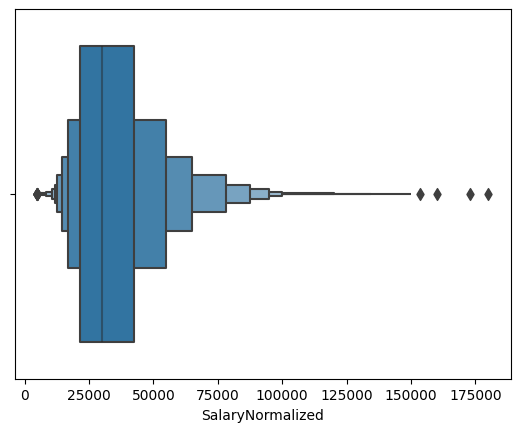

In [11]:
ax = sns.boxenplot(y_train, x=y_train)

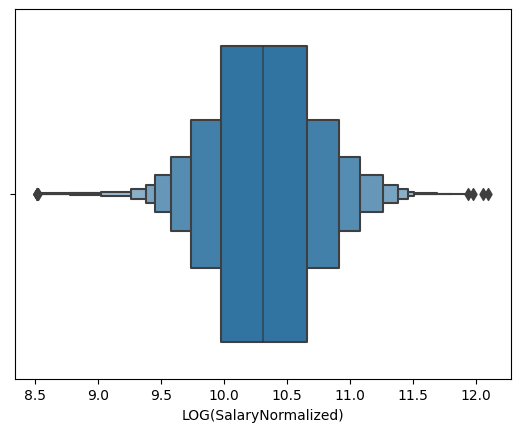

In [12]:
ax = sns.boxenplot(y_train, x=np.log(y_train))
ax.set_xlabel("LOG(SalaryNormalized)")
None

In [13]:
y_train.iloc[1]

97500

In [14]:
np.exp(np.log(y_train.iloc[1]))

97499.99999999997

**STEMMING ENABLED VERSION, WITHOUT LEMMATIZATION**

In [15]:
ss = SnowballStemmer('english')
sw = stopwords.words('english')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text) # giving all punctuation signs a space 
    text = re.sub(r"[^a-zA-Z+]+", r" ", text) # deleteng all elements that are not letters or signs
    text = " ".join([ss.stem(token) for token in text.split(" ") if (token not in sw) and token!="k"])
    return text

In [16]:
bar = tqdm(total=X_train.shape[0])
X_train_preprocessed = []
for i in range(X_train.shape[0]):
    X_train_preprocessed.append(preprocess_text(X_train.iloc[i]))
    bar.update()
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)

  0%|          | 0/24476 [00:00<?, ?it/s]

In [17]:
X_train_preprocessed.columns = ["text"]
y_train.index = range(y_train.shape[0])
X_train_preprocessed['target'] = y_train
X_train_preprocessed

,text,target
0,sas administr london client specialist life pe...,50000
1,job titl retail director locat midland souther...,97500
2,privat client solicitor year pqe east grinstea...,40000
3,mh devon cornwal excel opportun work fast gro...,22000
4,posit white good domest applianc engin field b...,24000
...,...,...
24471,job titl support worker puls communiti healthc...,14534
24472,busi analyst fx money market fix incom deriv f...,62499
24473,vb net c net sql develop tamworth staffordshir...,30000
24474,senior estim civil compani client famili run b...,65000


Before

In [18]:
X_train.iloc[24473]

'VB.NET/C .NET SQL  Developers  Tamworth, Staffordshire. If you are an experienced Developer and want to work for an established software development company with a fantastic product and great support. Apply today With over 25 years experience and a highly impressive client list from all over the world my client is entering a new phase in the digital market. It s a great time to join the dedicated and experienced team of developers who are passionate about what they do. As a trusted Microsoft Certified Partner my client delivers a fully integrated platform that makes a real difference to the customer. You must have strong commercial VB.NET or C .NET and SQL **** skills. Applicants must have a computing/IT degree which includes software development. Excellent working environment, modern offices and extremely friendly environment. Package includes: 25 days holiday, pension, Health care scheme, subsidised Gym membership. The Developer role is commutable from Tamworth, Lichfield, Sutton Co

After

In [19]:
X_train_preprocessed['text'][24473]

'vb net c net sql develop tamworth staffordshir experienc develop want work establish softwar develop compani fantast product great support appli today year experi high impress client list world client enter new phase digit market great time join dedic experienc team develop passion trust microsoft certifi partner client deliv fulli integr platform make real differ custom must strong commerci vb net c net sql skill applic must comput degre includ softwar develop excel work environ modern offic extrem friend environ packag includ day holiday pension health care scheme subsidis gym membership develop role commut tamworth lichfield sutton coldfield burton trent nuneaton hinckley birmingham appli today interview take place asap'

In [21]:
X_train_preprocessed

,text,target
0,sas administr london client specialist life pe...,50000
1,job titl retail director locat midland souther...,97500
2,privat client solicitor year pqe east grinstea...,40000
3,mh devon cornwal excel opportun work fast gro...,22000
4,posit white good domest applianc engin field b...,24000
...,...,...
24471,job titl support worker puls communiti healthc...,14534
24472,busi analyst fx money market fix incom deriv f...,62499
24473,vb net c net sql develop tamworth staffordshir...,30000
24474,senior estim civil compani client famili run b...,65000


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train_preprocessed, X_val_preprocessed = train_test_split(X_train_preprocessed, 
                                                            train_size=0.8, 
                                                            random_state=1, 
                                                            shuffle=True)

In [25]:
X_train_preprocessed.shape, X_val_preprocessed.shape

((19580, 2), (4896, 2))

In [26]:
X_train_preprocessed.to_csv("data/preprocessed_data_train.csv", index=False)

In [27]:
X_val_preprocessed.to_csv("data/preprocessed_data_val.csv", index=False)